In [ ]:
pip install pandas yfinance

In [ ]:
pip install tushare

In [ ]:
pip install matplotlib

In [ ]:
—————————————— Download Data ———————————————

In [8]:
import yfinance as yf

# 获取纳斯达克综合指数数据
nsdk_symbol = '^IXIC'
# 获取道琼斯工业平均指数数据
dqs_symbol = '^DJI'
# 获取标准普尔500指数数据
bzpr_symbol = '^GSPC'

#获取纳斯达克综合指数数据，指定起始日期和结束日期
nsdk_data = yf.download(nsdk_symbol, start='2022-01-01', end='2023-07-01')
nsdk_data.to_csv("A纳斯达克综合指数.csv", index=True)

dqs_data = yf.download(dqs_symbol, start='2022-01-01', end='2023-07-01')
dqs_data.to_csv("A道琼斯工业平均指数.csv", index=True)

bzpr_data = yf.download(bzpr_symbol, start='2022-01-01', end='2023-07-01')
bzpr_data.to_csv("A标准普尔500指数.csv", index=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
import tushare as ts
import pandas as pd
import time
import sys

# 上证指数代码sh 深证指数sz 创业板指数cyb
sh_data = ts.get_hist_data('sh', start='2022-01-01', end='2023-07-01')
sh_data = sh_data[::-1]
sh_data.columns = [col.title() for col in sh_data.columns]
sh_data.index.name = sh_data.index.name.title()
sh_data.index = pd.to_datetime(sh_data.index, format='%Y-%m-%d') 
# 将数据保存为CSV文件，文件名为data.csv
sh_data.to_csv("A上证指数.csv", index=True)  # 设置index=False表示不保存索引列

sz_data = ts.get_hist_data('sz', start='2022-01-01', end='2023-07-01')
sz_data = sz_data[::-1]
sz_data.columns = [col.title() for col in sz_data.columns]
sz_data.index.name = sz_data.index.name.title()
sz_data.index = pd.to_datetime(sz_data.index, format='%Y-%m-%d')
sz_data.to_csv("A深证指数.csv", index=True)  

cyb_data = ts.get_hist_data('cyb', start='2022-01-01', end='2023-07-01')
cyb_data = cyb_data[::-1]
cyb_data.columns = [col.title() for col in cyb_data.columns]
cyb_data.index.name = cyb_data.index.name.title()
cyb_data.index = pd.to_datetime(cyb_data.index, format='%Y-%m-%d')
cyb_data.to_csv("A创业板指数.csv", index=True)

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


In [ ]:
# —————————————— Line Chart Analysis ———————————————







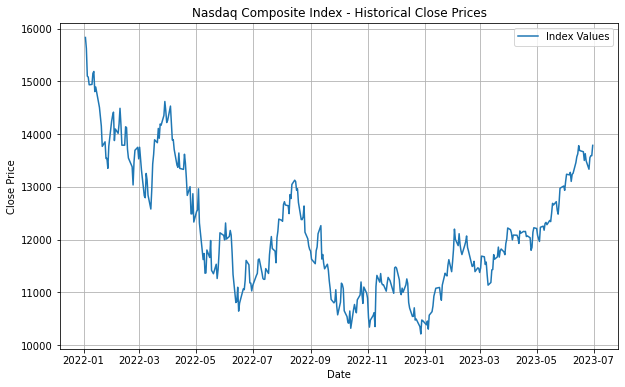

In [10]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


stock_market = [0,nsdk_data,dqs_data,bzpr_data,sh_data,sz_data,cyb_data]
stock_name = ['','Nasdaq Composite Index','DowJones Industrial Average Index','S&P 500 Index','Shanghai Composite Index','Shenzhen Index','ChiNext Index']
stock_index = 1
data = stock_market[stock_index]


# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Index Values')
# plt.plot(data.index, data['Volume'], label='Index Values')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(stock_name[stock_index] + ' - Historical Close Prices')
plt.legend()
plt.grid()
plt.show()

In [11]:
import pandas as pd

stock_index = 6
stock_data = stock_market[stock_index]

close = stock_data['Close']

# 创建一个Series对象
s = pd.Series(close)

# 计算基本统计量
mean = s.mean()
median = s.median()
mode = s.mode().tolist()  # 可能有多个众数
variance = s.var()
std_dev = s.std()
max_value = s.max() 
min_value = s.min()
quartiles = s.quantile([0.25, 0.5, 0.75]).tolist()


statistics_df = pd.DataFrame({
    'Metric': ['Mean', 'Median', 'Standard Deviation', 'max_value', 'min_value', 'Quartile1', 'Quartile2', 'Quartile3'],
    'Value': [mean, median, std_dev, max_value, min_value, quartiles[0], quartiles[1], quartiles[2]]
})

# 转换成字符串
statistics_df['Value'] = statistics_df['Value'].apply(lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x)
statistics_df['Value'] = statistics_df['Value'].apply(lambda x: round(float(x), 2) if isinstance(x, (float, int)) else x)

# 打印表格
print(statistics_df)


               Metric    Value
0                Mean  2507.37
1              Median  2434.73
2  Standard Deviation   229.47
3           max_value  3250.16
4           min_value  2123.96
5           Quartile1  2338.11
6           Quartile2  2434.73
7           Quartile3  2671.76


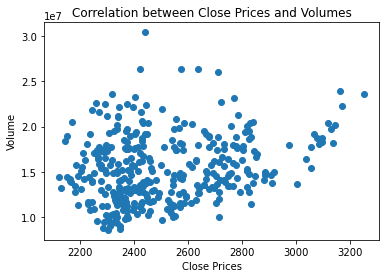

Pearson correlation coefficient is : 0.24


In [32]:

stock_index = 6
stock_data = stock_market[stock_index]
prices = stock_data['Close']
volumes = stock_data['Volume']
plt.figure(figsize=(6, 4))
# 创建散点图
plt.scatter(prices, volumes)
# 添加标题和标签
plt.title('Correlation between Close Prices and Volumes')
plt.xlabel('Close Prices')
plt.ylabel('Volume')

# 显示图形
plt.show()

# 计算皮尔逊相关系数
correlation_coefficient, _ = pearsonr(prices, volumes)

print('Pearson correlation coefficient is :', round(correlation_coefficient,2))

In [ ]:
# —————————————— SVM Model ———————————————







In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_squared_log_error,median_absolute_error,explained_variance_score,r2_score
import pandas as pd

In [118]:
stock_index = 4

data = stock_market[stock_index]
print(data.columns)

Index(['Open', 'High', 'Close', 'Low', 'Volume', 'Price_Change', 'P_Change',
       'Ma5', 'Ma10', 'Ma20', 'V_Ma5', 'V_Ma10', 'V_Ma20'],
      dtype='object')


                     Metric  Value
0        Mean Squared Error  47.96
1       Mean Absolute Error   5.64
2     Median Absolute Error   5.22
3  Explained Variance Score   0.98
4                  R2 Score   0.98


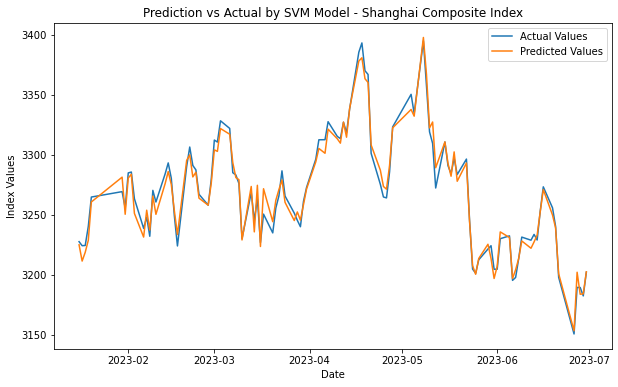

In [214]:

stock_index = 4

data = stock_market[stock_index]

features1=['Open','High','Low','Volume']
features2=['Open','High','Low','Volume','Price_Change','P_Change','Ma5','Ma10','Ma20','V_Ma5','V_Ma10','V_Ma20']
X, y = data[features2],data['Close']

# 将数据集分成前70%作为训练集，后30%作为测试集
train_size = int(0.7 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# 特征标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 构建SVR模型
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

# 预测
y_pred = svr.predict(X_test)

# 评估模型
# 计算均方误差（MSE）
mse = mean_squared_error(y_test, y_pred)
#平均绝对误差（MAE）
mae = mean_absolute_error(y_test, y_pred)
#均方对数误差 (MSLE)
msle = mean_squared_log_error(y_test, y_pred)
#中值绝对误差 (MedAE)
medae = median_absolute_error(y_test, y_pred)
#解释方差分数
evs = explained_variance_score(y_test, y_pred)
#R2 分数（决定系数）
R2 = r2_score(y_test, y_pred)


# 将指标存储在字典中
metrics = {
    'Mean Squared Error': mse,
    'Mean Absolute Error': mae,
    #'Mean Squared Log Error': msle,
    'Median Absolute Error': medae,
    'Explained Variance Score': evs,
    'R2 Score': R2
}

# 创建一个DataFrame
df_metrics = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])
df_metrics['Value'] = df_metrics['Value'].round(2)
# 显示DataFrame
print(df_metrics)

# 可视化预测结果和实际数据
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Values')
plt.plot(y_test.index, y_pred, label='Predicted Values')
plt.xlabel('Date')
plt.ylabel('Index Values')
plt.title('Prediction vs Actual' + ' by SVM Model - ' + stock_name[stock_index])
plt.legend()
plt.show()


In [ ]:
—————————————— LSTM Model ———————————————








4/4 [==============================] - 1s 7ms/step
                     Metric     Value
0        Mean Squared Error  15000.31
1       Mean Absolute Error     94.30
2     Median Absolute Error     70.74
3  Explained Variance Score      0.97
4                  R2 Score      0.96


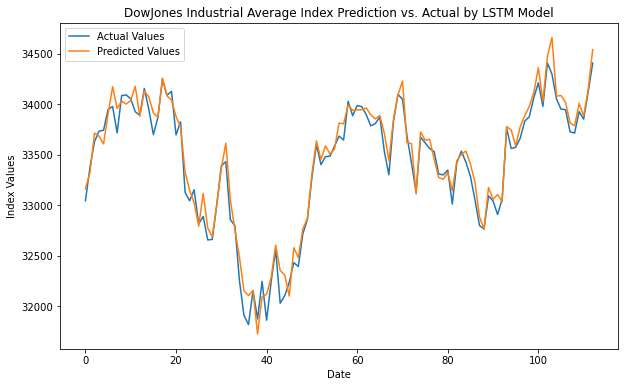

In [198]:
# 导入库
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import tensorflow as tf
import torch
import os
import random

# tf.keras.backend.clear_session()
# SEED = 100
# os.environ['PYTHONHASHSEED'] = str(SEED)
# np.random.seed(SEED)
# tf.random.set_seed(SEED)
# random.seed(SEED)


stock_index = 2
data = stock_market[stock_index]
# data = data.index.to_list()
features1=['Open','High','Low','Volume']
features2=['Open','High','Low','Volume','Price_Change','P_Change','Ma5','Ma10','Ma20','V_Ma5','V_Ma10','V_Ma20']
data_partial = data[features1]
# 数据预处理
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(data_partial)
y_scaled = scaler_y.fit_transform(data['Close'].values.reshape(-1, 1))

# 分割数据
train_size = int(len(X_scaled) * 0.7)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

# 改变形状以适应LSTM输入
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

def create_model():
   # 构建LSTM模型
    model = Sequential()
    # model.add(LSTM(50, input_shape=(len(data.columns), 1)))
    model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
    # model.add(LSTM(50, return_sequences=True))
    # model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = create_model()

# 训练模型
#model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0)
history1 = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test), verbose=0)
# 在测试集上进行预测
y_pred = model.predict(X_test)

# 反归一化预测结果
y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test)

# 评估模型
# 计算均方误差（MSE）
mse = mean_squared_error(y_test, y_pred)
#平均绝对误差（MAE）
mae = mean_absolute_error(y_test, y_pred)
#均方对数误差 (MSLE)
msle = mean_squared_log_error(y_test, y_pred)
#中值绝对误差 (MedAE)
medae = median_absolute_error(y_test, y_pred)
#解释方差分数
evs = explained_variance_score(y_test, y_pred)
#R2 分数（决定系数）
R2 = r2_score(y_test, y_pred)


# 将指标存储在字典中
metrics = {
    'Mean Squared Error': mse,
    'Mean Absolute Error': mae,
    #'Mean Squared Log Error': msle,
    'Median Absolute Error': medae,
    'Explained Variance Score': evs,
    'R2 Score': R2
}

# 创建一个DataFrame
df_metrics = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])
df_metrics['Value'] = df_metrics['Value'].round(2)
# 显示DataFrame
print(df_metrics)

# 可视化预测结果和实际数据
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.xlabel('Date')
plt.ylabel('Index Values')
plt.title(stock_name[stock_index] + ' Prediction vs. Actual' + ' by LSTM Model')
plt.legend()
plt.show()

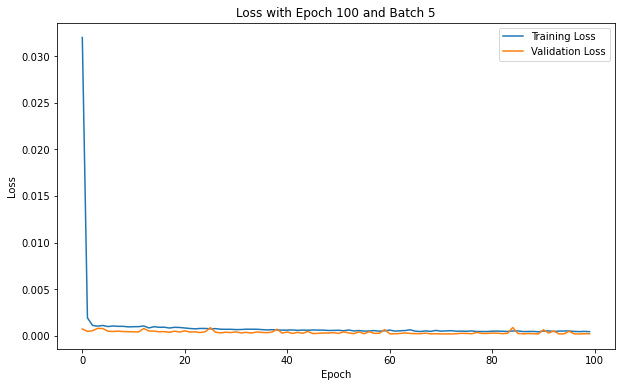

In [162]:
# 获取训练和验证损失历史
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制训练和验证损失
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

# 添加标签和标题
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss with Epoch 100 and Batch 5')
plt.legend()

# 显示图形
plt.show()

In [56]:
print(X_test.shape)

(113, 1, 6)


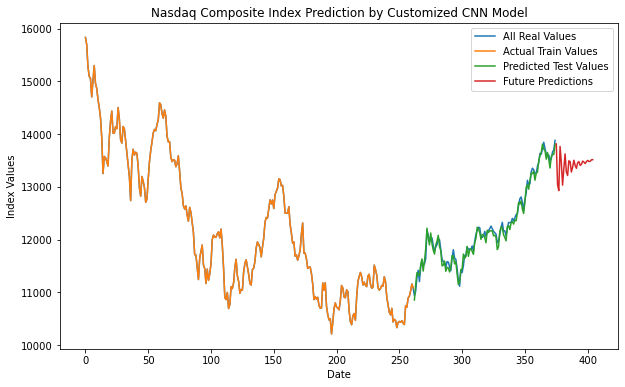

In [81]:
# 设置未来天数
future_days = 30
time_step = 60
# 使用最后一个时间窗口的数据作为输入
# last_time_window = X_test[-1].reshape((X_test.shape[0], 1, X_test.shape[1]))
# last_time_window = np.reshape(X_test[-1], (X_test.shape[0], 1, X_test.shape[1]))
# 获取最后一个时间窗口的数据
last_time_window = X_test[-1].reshape((1, X_test.shape[1], X_test.shape[2]))

# 获取真实值（训练集+测试集）
all_real_values = scaler_y.inverse_transform(X_scaled)[:, close_column_index]

# 反归一化预测结果
# test_prediction_data = np.zeros((len(test_predictions), data.shape[1]))
# test_prediction_data[:, close_column_index] = test_predictions[:, 0]
# test_predictions_rescaled = scaler_y.inverse_transform(test_prediction_data)[:, close_column_index]
test_predictions_rescaled = y_pred
#提取实际训练值的股指值
#actual_train_values = all_real_values[time_step: train_size + time_step + len(test_predictions_rescaled)]

# 提取实际训练集中的股指值
actual_train_values = all_real_values[0:train_size]

# 提取实际测试集中的股指值
actual_test_values = all_real_values[train_size + 0: train_size + 0 + len(test_predictions_rescaled)]

# 提取实际测试集中的股指值
#actual_test_values = all_real_values[train_size + time_step:]

# 存储未来预测的列表
future_predictions = []

# 逐天预测未来10天
for i in range(future_days):
    # 使用模型进行预测
    prediction = model.predict(last_time_window,verbose=0)

    # 将预测添加到未来预测的列表中
    future_predictions.append(scaler_y.inverse_transform(prediction))

    # 将预测添加到输入数据的最后一个时间窗口中，并移除第一个元素，以便下一次预测
    last_time_window = np.roll(last_time_window, shift=-1)
    last_time_window[0, -1, 0] = prediction

# 输出未来10天的预测
# print(future_predictions)

# 可视化预测结果和实际数据
plt.figure(figsize=(10, 6))

# 创建一个时间轴
time_axis = range(len(all_real_values) + future_days)

# 绘制所有真实值
plt.plot(all_real_values, label='All Real Values')

# 绘制实际训练值
plt.plot(time_axis[:train_size], actual_train_values, label='Actual Train Values')

# 绘制实际测试值
# plt.plot(time_axis[train_size:train_size + len(actual_test_values)], actual_test_values, label='Actual Test Values')

# 绘制测试集的预测值
plt.plot(time_axis[train_size:train_size + len(test_predictions_rescaled)], test_predictions_rescaled, label='Predicted Test Values')

# 绘制未来10天的预测值
plt.plot(time_axis[-future_days:], [item[0][0] for item in future_predictions], label='Future Predictions')


plt.xlabel('Date')
plt.ylabel('Index Values')
plt.title(stock_name[stock_index] + ' Prediction by Customized CNN Model')
plt.legend()
plt.show()

In [ ]:
—————————————— Customized CNN Model ———————————————

4/4 [==============================] - 0s 5ms/step
                     Metric  Value
0        Mean Squared Error  69.58
1       Mean Absolute Error   6.64
2     Median Absolute Error   5.71
3  Explained Variance Score   0.98
4                  R2 Score   0.97


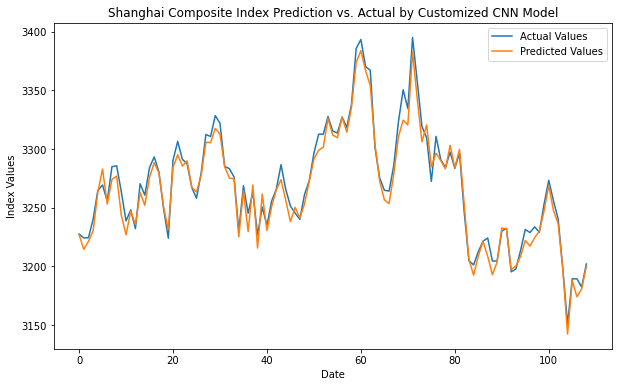

In [13]:
# SEED = 1000
# os.environ['PYTHONHASHSEED'] = str(SEED)
# np.random.seed(SEED)
# tf.random.set_seed(SEED)
# random.seed(SEED)

stock_index = 4
data = stock_market[stock_index]
# feature = ['Open','High','Low','Volume','Close']
# data = data[feature]
features1=['Open','High','Low','Volume']
features2=['Open','High','Low','Volume','Price_Change','P_Change','Ma5','Ma10','Ma20','V_Ma5','V_Ma10','V_Ma20']
data_partial = data[features2]

# 数据预处理
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(data_partial)
y_scaled = scaler_y.fit_transform(data['Close'].values.reshape(-1, 1))

# 分割数据
train_size = int(len(X_scaled) * 0.7)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 构建卷积神经网络模型
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(len(data_partial.columns), 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # 线性激活函数用于回归
])

# 编译模型
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# 训练模型
#model.fit(X_train, y_train, epochs=20, batch_size=32,verbose=0)
# 训练模型并保存历史记录
history2 = model2.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test), verbose=0)

# 在测试集上进行预测
y_pred_scaled = model2.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test = scaler_y.inverse_transform(y_test)


# 评估模型
# 计算均方误差（MSE）
mse = mean_squared_error(y_test, y_pred)
#平均绝对误差（MAE）
mae = mean_absolute_error(y_test, y_pred)
#均方对数误差 (MSLE)
msle = mean_squared_log_error(y_test, y_pred)
#中值绝对误差 (MedAE)
medae = median_absolute_error(y_test, y_pred)
#解释方差分数
evs = explained_variance_score(y_test, y_pred)
#R2 分数（决定系数）
R2 = r2_score(y_test, y_pred)


# 将指标存储在字典中
metrics = {
    'Mean Squared Error': mse,
    'Mean Absolute Error': mae,
    #'Mean Squared Log Error': msle,
    'Median Absolute Error': medae,
    'Explained Variance Score': evs,
    'R2 Score': R2
}

# 创建一个DataFrame
df_metrics = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])
df_metrics['Value'] = df_metrics['Value'].round(2)
# 显示DataFrame
print(df_metrics)

# 可视化预测结果和实际数据
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.xlabel('Date')
plt.ylabel('Index Values')
plt.title(stock_name[stock_index] + ' Prediction vs. Actual' + ' by Customized CNN Model')
plt.legend()
plt.show()

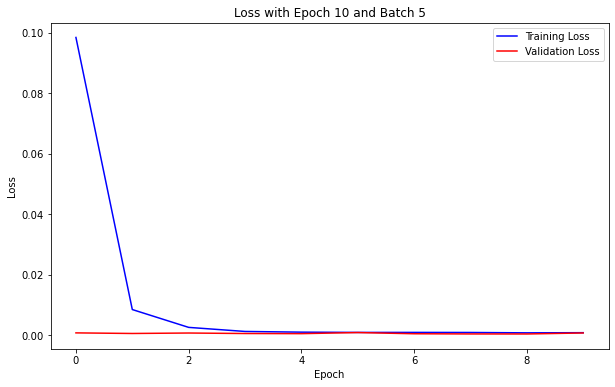

In [164]:
# 获取训练和验证损失历史
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制训练和验证损失
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')

# 添加标签和标题
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss with Epoch 10 and Batch 5')
plt.legend()

# 显示图形
plt.show()

In [ ]:
—————————————— Customized CNN Model with 60 days time step ———————————————

2/2 [==============================] - 0s 3ms/step
                     Metric      Value
0        Mean Squared Error  646495.29
1       Mean Absolute Error     674.26
2     Median Absolute Error     732.46
3  Explained Variance Score       0.32
4                  R2 Score      -0.74


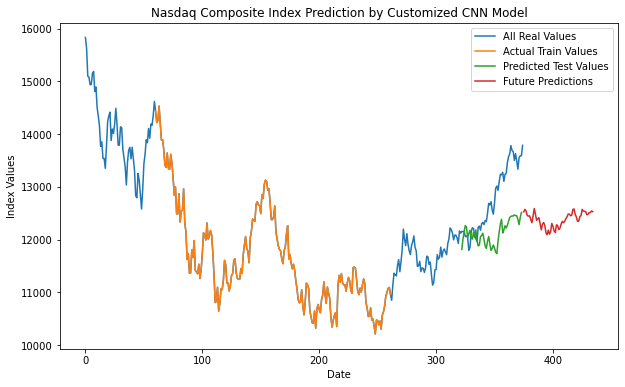

In [212]:
np.random.seed(100)

#设置参数

future_days = 60 #预测未来天数
time_step = 60 # 使用60天的时间步长
data_rate = 0.7 #数据比例


#100，1最佳组合
epochs=100 
batch_size=5


stock_index = 1 #US是1-3,CN是4-6
close_column_index = 0
if stock_index <4:
    close_column_index = 3  # 如果Close指数所在列 US是3，CN是2
else:
    close_column_index = 2
    
data = stock_market[stock_index]

# 归一化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# 划分训练和测试数据
train_size = int(len(scaled_data) * data_rate)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# 创建时间序列数据集
def create_dataset(dataset, time_step, close_column_index):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i+time_step)])
        Y.append(dataset[i + time_step, close_column_index])  # 使用Close指数的列索引
    return np.array(X), np.array(Y)

X_train, y_train = create_dataset(train_data, time_step, close_column_index)
X_test, y_test = create_dataset(test_data, time_step, close_column_index)

# 构建卷积神经网络模型
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], data.shape[1])),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # 线性激活函数用于回归
])

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# 训练模型
#model.fit(X_train, y_train, epochs=20, batch_size=32,verbose=0)
# 训练模型并保存历史记录
history3 = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test), verbose=0)

# 预测
test_predictions = model.predict(X_test)

# 获取真实值（训练集+测试集）
all_real_values = scaler.inverse_transform(scaled_data)[:, close_column_index]

# 反归一化预测结果
test_prediction_data = np.zeros((len(test_predictions), data.shape[1]))
test_prediction_data[:, close_column_index] = test_predictions[:, 0]
test_predictions_rescaled = scaler.inverse_transform(test_prediction_data)[:, close_column_index]

#提取实际训练值的股指值
#actual_train_values = all_real_values[time_step: train_size + time_step + len(test_predictions_rescaled)]

# 提取实际训练集中的股指值
actual_train_values = all_real_values[time_step:train_size]

# 提取实际测试集中的股指值
actual_test_values = all_real_values[train_size + time_step: train_size + time_step + len(test_predictions_rescaled)]

# 提取实际测试集中的股指值
#actual_test_values = all_real_values[train_size + time_step:]

predictions = []
scaled_features = scaled_data.copy()

for i in range(future_days):
    input_data = np.expand_dims(scaled_features[-time_step:], axis=0)
    prediction = model.predict(input_data, verbose=0)
    
    # 创建一个新的数组来存放下一个时间步的特征，并插入预测值到Close指数的位置
    next_input = list(scaled_features[-1])
    next_input[close_column_index] = prediction[0][0]
    scaled_features = np.vstack((scaled_features, np.array(next_input)))
    predictions.append(prediction[0][0])

    
# 反归一化预测结果
prediction_data = np.zeros((future_days, data.shape[1]))
prediction_data[:, close_column_index] = predictions
predictions_rescaled = scaler.inverse_transform(prediction_data)[:, close_column_index]

# 评估模型
# 计算均方误差（MSE）
mse = mean_squared_error(actual_test_values, test_predictions_rescaled)
#平均绝对误差（MAE）
mae = mean_absolute_error(actual_test_values, test_predictions_rescaled)
#均方对数误差 (MSLE)
msle = mean_squared_log_error(actual_test_values, test_predictions_rescaled)
#中值绝对误差 (MedAE)
medae = median_absolute_error(actual_test_values, test_predictions_rescaled)
#解释方差分数
evs = explained_variance_score(actual_test_values, test_predictions_rescaled)
#R2 分数（决定系数）
R2 = r2_score(actual_test_values, test_predictions_rescaled)

# 将指标存储在字典中
metrics = {
    'Mean Squared Error': mse,
    'Mean Absolute Error': mae,
    #'Mean Squared Log Error': msle,
    'Median Absolute Error': medae,
    'Explained Variance Score': evs,
    'R2 Score': R2
}

# 创建一个DataFrame
df_metrics = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])
df_metrics['Value'] = df_metrics['Value'].round(2)
# 显示DataFrame
print(df_metrics)


# 可视化预测结果和实际数据
plt.figure(figsize=(10, 6))
# 创建一个时间轴
time_axis = range(len(all_real_values) + future_days)

# 绘制所有真实值
plt.plot(time_axis[:len(all_real_values)], all_real_values, label='All Real Values')

# 绘制实际训练值
plt.plot(time_axis[time_step:len(actual_train_values)+time_step], actual_train_values, label='Actual Train Values')

# 绘制测试集的预测值
plt.plot(time_axis[train_size + time_step:train_size + len(test_predictions_rescaled) + time_step], test_predictions_rescaled, label='Predicted Test Values')

# 绘制未来天的预测值
plt.plot(time_axis[-future_days:], predictions_rescaled, label='Future Predictions')

plt.xlabel('Date')
plt.ylabel('Index Values')
plt.title(stock_name[stock_index] + ' Prediction by Customized CNN Model')
plt.legend()
plt.show()


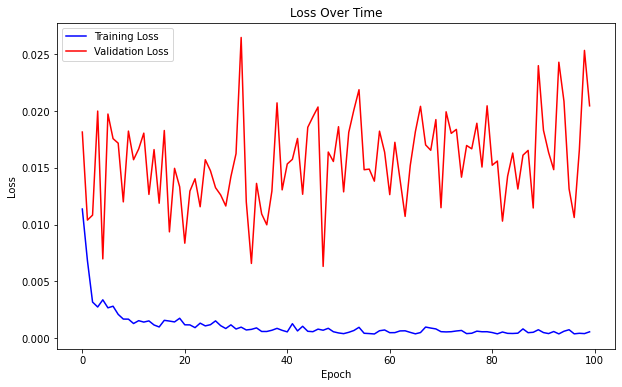

In [213]:
# 获取训练和验证损失历史
train_loss = history3.history['loss']
val_loss = history3.history['val_loss']

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制训练和验证损失
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')

# 添加标签和标题
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Time')
plt.legend()

# 显示图形
plt.show()

In [ ]:
—————————————— LSTM Model with 60 days time step ———————————————

In [211]:


#设置参数

future_days = 60 #预测未来天数
time_step = 60 # 使用60天的时间步长
data_rate = 0.7 #数据比例

#100，1最佳组合
epochs=100 
batch_size=5

stock_index = 1 #US是1-3,CN是4-6
close_column_index = 0
if stock_index <4:
    close_column_index = 3  # 如果Close指数所在列 US是3，CN是2
else:
    close_column_index = 2
    
data = stock_market[stock_index]
all_dates = data.index.to_list()

# 归一化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# 划分训练和测试数据
train_size = int(len(scaled_data) * data_rate)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# 创建时间序列数据集
def create_dataset(dataset, time_step, close_column_index):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i+time_step)])
        Y.append(dataset[i + time_step, close_column_index])  # 使用Close指数的列索引
    return np.array(X), np.array(Y)

X_train, y_train = create_dataset(train_data, time_step, close_column_index)
X_test, y_test = create_dataset(test_data, time_step, close_column_index)

#构建LSTM模型
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], data.shape[1])))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# 训练模型
#model.fit(X_train, y_train, epochs=20, batch_size=32,verbose=0)
# 训练模型并保存历史记录
history4 = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test), verbose=0)

# 预测2
test_predictions = model.predict(X_test)

# 获取真实值（训练集+测试集）
all_real_values = scaler.inverse_transform(scaled_data)[:, close_column_index]

# 反归一化预测结果
test_prediction_data = np.zeros((len(test_predictions), data.shape[1]))
test_prediction_data[:, close_column_index] = test_predictions[:, 0]
test_predictions_rescaled = scaler.inverse_transform(test_prediction_data)[:, close_column_index]

#提取实际训练值的股指值
#actual_train_values = all_real_values[time_step: train_size + time_step + len(test_predictions_rescaled)]

# 提取实际训练集中的股指值
actual_train_values = all_real_values[time_step:train_size]

# 提取实际测试集中的股指值
actual_test_values = all_real_values[train_size + time_step: train_size + time_step + len(test_predictions_rescaled)]

# 提取实际测试集中的股指值
#actual_test_values = all_real_values[train_size + time_step:]

predictions = []
scaled_features = scaled_data.copy()

for i in range(future_days):
    input_data = np.expand_dims(scaled_features[-time_step:], axis=0)
    prediction = model.predict(input_data, verbose=0)
    
    # 创建一个新的数组来存放下一个时间步的特征，并插入预测值到Close指数的位置
    next_input = list(scaled_features[-1])
    next_input[close_column_index] = prediction[0][0]
    scaled_features = np.vstack((scaled_features, np.array(next_input)))
    predictions.append(prediction[0][0])

    
# 反归一化预测结果
prediction_data = np.zeros((future_days, data.shape[1]))
prediction_data[:, close_column_index] = predictions
predictions_rescaled = scaler.inverse_transform(prediction_data)[:, close_column_index]

# 评估模型
# 计算均方误差（MSE）
mse = mean_squared_error(actual_test_values, test_predictions_rescaled)
#平均绝对误差（MAE）
mae = mean_absolute_error(actual_test_values, test_predictions_rescaled)
#均方对数误差 (MSLE)
msle = mean_squared_log_error(actual_test_values, test_predictions_rescaled)
#中值绝对误差 (MedAE)
medae = median_absolute_error(actual_test_values, test_predictions_rescaled)
#解释方差分数
evs = explained_variance_score(actual_test_values, test_predictions_rescaled)
#R2 分数（决定系数）
R2 = r2_score(actual_test_values, test_predictions_rescaled)

# 将指标存储在字典中
metrics = {
    'Mean Squared Error': mse,
    'Mean Absolute Error': mae,
    #'Mean Squared Log Error': msle,
    'Median Absolute Error': medae,
    'Explained Variance Score': evs,
    'R2 Score': R2
}

# 创建一个DataFrame
df_metrics = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])
df_metrics['Value'] = df_metrics['Value'].round(2)
# 显示DataFrame
print(df_metrics)





2/2 [==============================] - 4s 89ms/step
                     Metric     Value
0        Mean Squared Error  83834.96
1       Mean Absolute Error    244.67
2     Median Absolute Error    195.83
3  Explained Variance Score      0.91
4                  R2 Score      0.77


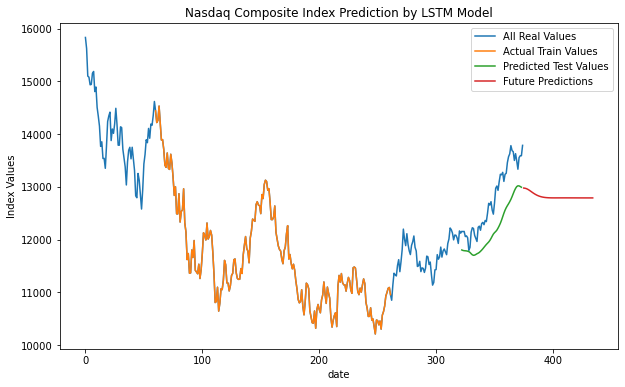

In [209]:
# 可视化预测结果和实际数据
plt.figure(figsize=(10, 6))
# 创建一个时间轴
time_axis = range(len(all_real_values) + future_days)

# 绘制所有真实值
plt.plot(time_axis[:len(all_real_values)], all_real_values, label='All Real Values')

# 绘制实际训练值
plt.plot(time_axis[time_step:len(actual_train_values)+time_step], actual_train_values, label='Actual Train Values')

# 绘制测试集的预测值
plt.plot(time_axis[train_size + time_step:train_size + len(test_predictions_rescaled) + time_step], test_predictions_rescaled, label='Predicted Test Values')

# 绘制未来天的预测值
plt.plot(time_axis[-future_days:], predictions_rescaled, label='Future Predictions')

plt.xlabel('date')
plt.ylabel('Index Values')
plt.title(stock_name[stock_index] + ' Prediction by LSTM Model')
plt.legend()
plt.show()

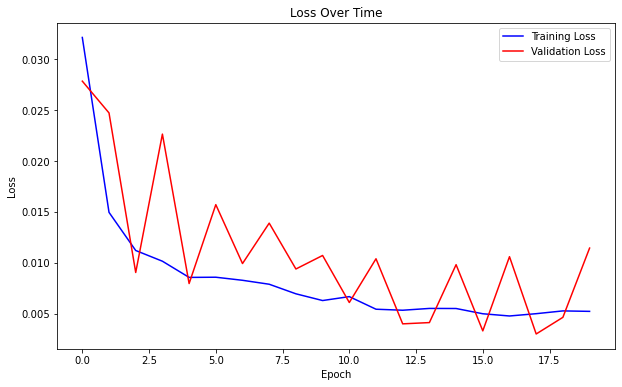

In [210]:
# 获取训练和验证损失历史
train_loss = history4.history['loss']
# train_loss = scaler.inverse_transform(train_loss)
val_loss = history4.history['val_loss']

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制训练和验证损失
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')

# 添加标签和标题
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Time')
plt.legend()

# 显示图形
plt.show()